# 課題4
_2016/12/28 大塚 佑助 132918Z [mjhd.devlion@gmail.com](mailto:mjhd.devlion@gmail.com)_

# 概要

このレポートでは、[UCI Machine Learning Repository: Housing Data Set
](https://archive.ics.uci.edu/ml/datasets/Housing)を用いて、各種解析を行う。
このデータセットは、ボストンにおける住宅価格とその地域の情報をまとめたものであり、主に回帰分析のサンプルとして使用されている。
以下に、このデータセットの概要の原文を示す。

In [1]:
# coding: -*- utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import sklearn
import scipy.stats as stats
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
boston = sklearn.datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# 可視化

まずは、データセットの内容を確認するため、データの可視化を行ってみる。

In [4]:
boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


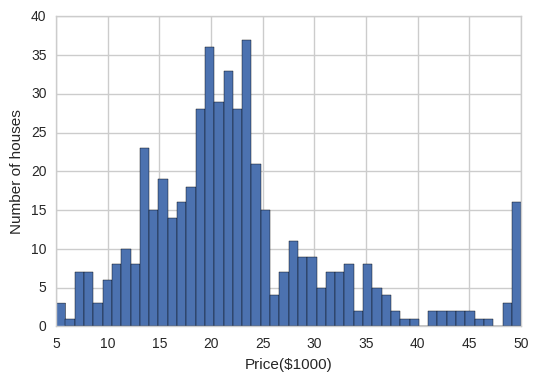

In [5]:
plt.hist(boston.target, bins=50)

plt.xlabel("Price($1000)")
plt.ylabel("Number of houses")

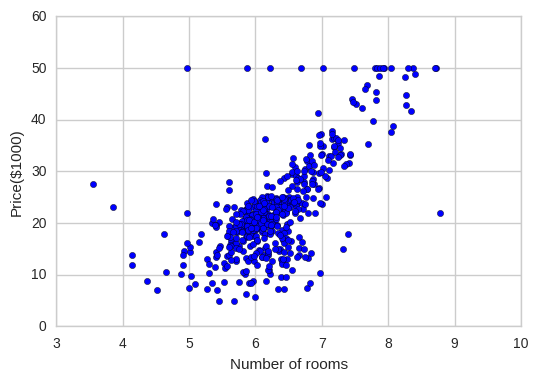

In [6]:
# 五番目の列が部屋の個数
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel("Price($1000)")
plt.xlabel("Number of rooms")

# 住宅価格の解析

住宅価格とその他のデータについて、どのような関係があるのかを解析する。線形回帰モデルを用いて、住宅価格を目的変数に、その他のデータを説明変数として回帰分析を行う。その結果、最も決定係数が大きなデータが住宅価格に最も関係のあるデータであるといえる。

In [7]:
# 線形回帰モデル
lreg = sklearn.linear_model.LinearRegression()

# 説明変数(住宅価格以外のデータ)
X_multi = boston_df

# 目的変数(住宅価格)
Y_target = boston.target

lreg.fit(X_multi, Y_target)

# 係数テーブルを作成する
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ["Features"]

coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


結果より、RM(部屋数)が住宅価格に最も関係のあるデータであると言える。

# 部屋の個数と住宅価格

部屋の個数と住宅価格の関係について、部屋数を説明変数、住宅価格を目的変数として線形回帰を行ってみる。  
まずは、目的変数(住宅価格)を"Price"というキーで格納し、回帰直線を描画する。

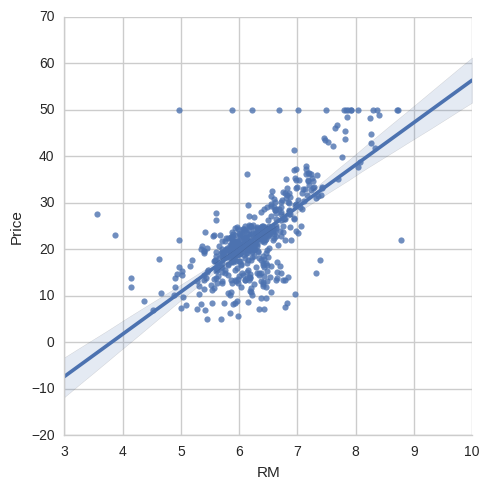

In [8]:
boston_df["Price"] = boston.target

sns.lmplot("RM", "Price", data = boston_df)

部屋数の増加に伴い、住宅価格も増加の傾向があることが分かった。

# 住宅価格の予想

データセット中のデータより、教師あり学習を行い、住宅価格の予想を行う。  
まず、データセットを、sklearnに用意されているtrain_test_splitを用いて学習用データと教師用のデータに分離する。  
その後、実際に線形回帰を行う。

In [9]:
X_multi = boston_df.drop("Price", 1)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

lreg = sklearn.linear_model.LinearRegression()

lreg.fit(X_train, Y_train)

pred_test  = lreg.predict(X_test)

学習したモデルを、平均二乗誤差を用いて確認する。

In [10]:
print("平均二乗誤差=%.2f" % np.mean((Y_test - pred_test) ** 2))

平均二乗誤差=26.32


また、残差プロット、Q-Qプロットを用いて学習したモデルを確認する。

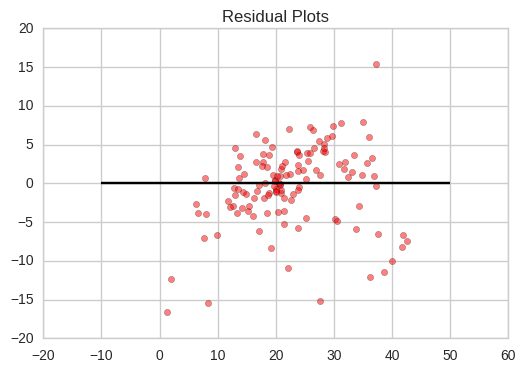

In [11]:
plt.scatter(pred_test, (pred_test - Y_test), c="r", alpha=0.5)

plt.hlines(y = 0, xmin=-10, xmax=50)
plt.title("Residual Plots")

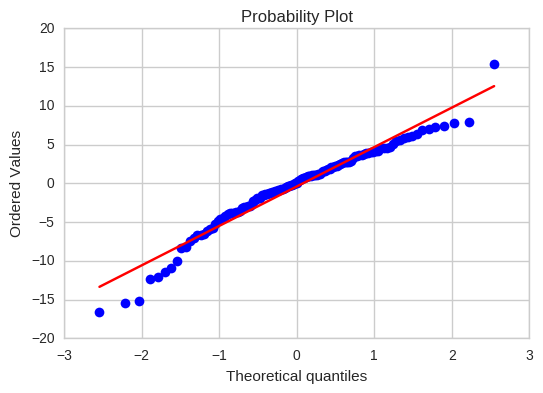

In [12]:
stats.probplot((pred_test - Y_test), dist="norm", plot=plt)
plt.show()

残差プロットより、y=0を中心にランダムにばらけていると言えるため、正しく予測ができていると言える。  
また、Q-Qプロットをみると、直線に近い図になっていると言えるため、残差は正規分布に従っていると言える。

# 参考文献
[Lec72-75_線形回帰](http://www.tsjshg.info/udemy/Lec72-75.html)  
[【統計学】Q-Qプロットの仕組みをアニメーションで理解する。 - Qiita](http://qiita.com/kenmatsu4/items/59605dc745707e8701e0)  
[重回帰分析とは｜分析力をコアとするデータソリューションカンパニー・株式会社ALBERT（アルベルト）](http://www.albert2005.co.jp/technology/data/m_regression.html)  
[Release history — scikit-learn 0.18.1 documentation](http://scikit-learn.org/stable/whats_new.html)  